<p style="background-color:#0A1128; font-family:calibri, sans-serif; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Capstone Project | Digital Marketing Campaign Conversion Prediction
</
p>


In [2]:
from IPython.display import Image, display

# Display an image
image_url = "https://miro.medium.com/v2/resize:fit:1060/1*62g30FPNpcIJAxGKwK1xdw.png"
display(Image(url=image_url, width=2100))

<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <h3 align="left" style="color:#61DAFB;">Problem:</h3>
    <p>
    This project is about using machine learning to predict which customers are likely to make a purchase after seeing a marketing campaign. By understanding these customers, the company can target them more effectively, spend money wisely on ads, and increase sales. The goal is to build a strong model that looks at customer details and their interaction with the campaign to improve marketing efforts and get better results from the ads.
    </p>
</div>


<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <h3 align="left" style="color:#61DAFB;">Objective</h3>
    <p>
        <strong>Explore the Dataset:</strong> Identify patterns, distributions, and relationships within the data.<br><br>
        <strong>Perform Detailed Exploratory Data Analysis (EDA):</strong> Analyze bivariate relationships in relation to the target variable.<br><br>
        <strong>Preprocessing Steps:</strong>
        <ul>
            <li>Eliminate irrelevant features</li>
            <li>Handle missing values</li>
            <li>Address outliers</li>
            <li>Encode categorical features</li>
        </ul>
        <strong>Model Development:</strong>
        <ul>
            <li>Creating a Hyperparameter tuning for the each models.</li>
            <li>Implement and fine-tune classification models such as Logistic Regression, SVM, Decision Trees, Random Forest and  K-Nearest Neighbors (KNN).</li>
        </ul>
        <strong>Evaluate and Compare Model Performance:</strong> Use precision, recall, and F1-score to measure and compare the models' effectiveness.
    </p>
</div>


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #0A1128; font-size:115%; color: #61DAFB; font-family: 'Courier New', monospace; text-align:left; border: 2px solid #61DAFB;">

<h3 align="left"><font color=#61DAFB>Table of Contents:</font></h3>
    
* [step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Summary](#summary)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Numerical Variables Univariate Analysis](#num_uni)
        - [Step 4.1.2 | Categorical Variables Univariate Analysis](#cat_uni)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
        - [Step 4.2.1 | Numerical Features vs Target](#num_target)
        - [Step 4.2.2 | Categorical Features vs Target](#cat_target)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Irrelevant Features Removal](#feature_removal)
    - [Step 5.2 | Missing Value Treatment](#missing)
    - [Step 5.3 | Outlier Treatment](#outlier)
    - [Step 5.4 | Feature Engineering & Encoding](#feteng)
    - [Step 5.5 | Scaling Numeric Columns](#scale)
    - [Step 5.6 | Splitting The Data](#split)
* [Step 6 | Decision Tree Model Building](#dt)
    - [Step 6.1 | Decision Tree Hyperparameter Tuning](#dt_hp)
    - [Step 6.2 | Decision Tree Model Evaluation](#dt_evl)
* [Step 7 | Random Forest Model Building](#rf)
    - [Step 7.1 | Random Forest Hyperparameter Tuning](#rf_hp)
    - [Step 7.2 | Random Forest Model Evaluation](#rf_evl)
* [Step 8 | Gradient Boosting Model Building](#gb)
    - [Step 8.1 | Gradient Boosting Hyperparameter Tuning](#gb_hp)
    - [Step 8.2 | Gradient Boosting Model Evaluation](#gb_evl)
* [Step 9 | XGBoost Model Building](#XGB)
    - [Step 9.1 | XGBoost Hyperparameter Tuning](#XGB_hp)
    - [Step 9.2 | XGBoost Model Evaluation](#XGB_evl)
* [Step 10 | Logistic Regression Model Building](#LR)
    - [Step 10.1 | Logistic Regression Hyperparameter Tuning](#LR_hp)
    - [Step 10.2 | Logistic Regression Model Evaluation](#LR_evl)
* [Step 11 | Conclusion](#conclusion)
</div>


<a id="import"></a>
<p style="background-color:#0A1128; font-family: 'Orbitron', sans-serif, monospace; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Step 1 | Import Libraries
</p>


⬆️ <a href="#contents_tabel" style="color:#61DAFB; text-decoration:none;">Table of Contents</a>


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>
<p style="background-color:#0A1128; font-family: 'Orbitron', sans-serif, monospace; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Step 2 | Read Dataset
</p>


⬆️ <a href="#contents_tabel" style="color:#61DAFB; text-decoration:none;">Table of Contents</a>


In [11]:
data = pd.read_csv("digital_marketing_campaign_dataset.csv")

In [13]:
data.shape

(8000, 20)

In [15]:
data['Conversion'].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #1e1e2e; font-size:120%; text-align:center; color: #ffffff; font-family: Arial, sans-serif;">

<h2 align="left" style="color:#61DAFB;">Dataset Description:</h2>

<table style="width:100%; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #27293d;">
      <th style="padding: 8px; border: 1px solid #3d3d5c; text-align: center; color: #61DAFB;">Variable</th>
      <th style="padding: 8px; border: 1px solid #3d3d5c; text-align: center; color: #61DAFB;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">CustomerID</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Unique identifier for each customer.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Age</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Age of the customer.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Gender</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Gender of the customer (Male/Female).</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Income</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Annual income of the customer in USD.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">CampaignChannel</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">CampaignType</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">AdSpend</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Amount spent on the marketing campaign in USD.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">ClickThroughRate</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Rate at which customers click on the marketing content.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">ConversionRate</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Rate at which clicks convert to desired actions (e.g., purchases).</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">AdvertisingPlatform</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Confidential.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">AdvertisingTool</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Confidential.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">WebsiteVisits</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Number of visits to the website.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">PagesPerVisit</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Average number of pages visited per session.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">TimeOnSite</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Average time spent on the website per visit (in minutes).</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">SocialShares</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Number of times the marketing content was shared on social media.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">EmailOpens</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Number of times marketing emails were opened.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">EmailClicks</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Number of times links in marketing emails were clicked.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">PreviousPurchases</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Number of previous purchases made by the customer.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">LoyaltyPoints</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Number of loyalty points accumulated by the customer.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Conversion</td>
      <td style="padding: 8px; border: 1px solid #3d3d5c; color: #E1E1E6;">Binary variable indicating whether the customer converted (1) or not (0).</td>
    </tr>
  </tbody>
</table>
</div>


<a id="summary"></a>
<p style="background-color:#0A1128; font-family: 'Orbitron', sans-serif, monospace; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Step 3 | Data Summary
</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="basic"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 3.1 |</span><span style='color:#61DAFB;'> Dataset Basic Information</span>
</h2>


In [20]:
# Data Infomation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <h2 align="left" style="color:#61DAFB;">Inferences:</h2>
    <ul>
        <li><strong>Number of Entries:</strong> The dataset consists of <strong>8000 entries</strong>, ranging from index 0 to 7999.</li>
        <li><strong>Columns:</strong> There are <strong>20 columns</strong> in the dataset corresponding to various attributes of the patients and results of tests.</li>
        <li><strong>Data Types:</strong>
            <ul>
                <li>10 columns with <code>int64</code> datatypes.</li>
                <li>5 columns with <code>float64</code> datatypes.</li>
                <li>5 columns with <code>object</code> datatypes (Gender, CampaignChannel, CampaignType, AdvertisingPlatform, AdvertisingTool).</li>
            </ul>
        </li>
        <li><strong>Missing Values:</strong> There are not any null values in the dataset.</li>
    </ul>
</div>


<a id="num_statistics"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 3.2 |</span><span style='color:#61DAFB;'> Summary Statistics for Numerical Variables</span>
</h2>


In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.0,11999.500000,2309.545410,8000.000000,9999.750000,11999.500000,13999.250000,15999.000000
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000


<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <h2 align="left" style="color:#61DAFB;">Numerical Features</h2>
    <ul>
        <li><strong>Number of Entries:</strong> The dataset consists of <strong>8000 entries</strong> representing various customer data.</li>
        <li><strong>CustomerID:</strong> The CustomerID ranges from <strong>8000</strong> to <strong>15999</strong>, with an average of <strong>11999.5</strong>.</li>
        <li><strong>Age:</strong> The average age of the customers is <strong>43.63 years</strong>, with a minimum age of <strong>18</strong> and a maximum age of <strong>69</strong>.</li>
        <li><strong>Income:</strong> The average income is <strong>84,664.20</strong>, with values ranging from <strong>20,014</strong> to <strong>149,986</strong>.</li>
        <li><strong>Ad Spend:</strong> The average advertising spend is <strong>5000.94</strong>, with a range from <strong>100.05</strong> to <strong>9997.91</strong>.</li>
        <li><strong>Click Through Rate:</strong> The average click-through rate is <strong>0.1548</strong>, ranging from <strong>0.0100</strong> to <strong>0.2999</strong>.</li>
        <li><strong>Conversion Rate:</strong> The average conversion rate is <strong>0.1044</strong>, with a minimum of <strong>0.0100</strong> and a maximum of <strong>0.1999</strong>.</li>
        <li><strong>Website Visits:</strong> Customers visited the website an average of <strong>24.75 times</strong>, with visits ranging from <strong>0</strong> to <strong>49</strong>.</li>
        <li><strong>Pages per Visit:</strong> On average, customers viewed <strong>5.55 pages per visit</strong>, with a range from <strong>1.00</strong> to <strong>9.99 pages</strong>.</li>
        <li><strong>Time on Site:</strong> The average time spent on the site is <strong>7.73 minutes</strong>, with a minimum of <strong>0.5 minutes</strong> and a maximum of <strong>14.99 minutes</strong>.</li>
        <li><strong>Social Shares:</strong> Customers shared content an average of <strong>49.80 times</strong>, ranging from <strong>0</strong> to <strong>99</strong> shares.</li>
        <li><strong>Email Opens:</strong> On average, customers opened <strong>9.48</strong> emails, with values ranging from <strong>0</strong> to <strong>19</strong> opens.</li>
        <li><strong>Email Clicks:</strong> The average number of clicks on emails is <strong>4.47</strong>, with a range from <strong>0</strong> to <strong>9</strong>.</li>
        <li><strong>Previous Purchases:</strong> The average number of previous purchases is <strong>4.49</strong>, with a range from <strong>0</strong> to <strong>9</strong>.</li>
        <li><strong>Loyalty Points:</strong> Customers have an average of <strong>2490.27 loyalty points</strong>, with a range from <strong>0</strong> to <strong>4999</strong> points.</li>
    </ul>
</div>


<a id="cat_statistics"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 3.2 |</span><span style='color:#61DAFB;'> Summary Statistics for Categorical Variables</span>
</h2>


In [28]:
data.describe(include='object')

,Gender,CampaignChannel,CampaignType,AdvertisingPlatform,AdvertisingTool
count,8000,8000,8000,8000,8000
unique,2,5,4,1,1
top,Female,Referral,Conversion,IsConfid,ToolConfid
freq,4839,1719,2077,8000,8000


<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <h2 align="left" style="color:#61DAFB;">Categorical Features</h2>
    <ul>
        <li><strong>Gender:</strong> The dataset includes <strong>8000 entries</strong>, with <strong>2 unique categories</strong> (Male and Female). The most frequent category is <strong>Female</strong>, appearing <strong>4839 times</strong>.</li>
        <li><strong>Campaign Channel:</strong> There are <strong>5 unique channels</strong>, with <strong>Referral</strong> being the most frequently used channel (<strong>1719 entries</strong>).</li>
        <li><strong>Campaign Type:</strong> The dataset consists of <strong>4 unique campaign types</strong>. The most common type is <strong>Conversion</strong>, appearing <strong>2077 times</strong>.</li>
        <li><strong>Advertising Platform:</strong> There is <strong>1 unique platform</strong>, <strong>IsConfid</strong>, used across all <strong>8000 entries</strong>.</li>
        <li><strong>Advertising Tool:</strong> There is <strong>1 unique tool</strong>, <strong>ToolConfid</strong>, used consistently in all campaigns (<strong>8000 entries</strong>).</li>
    </ul>
</div>

<a id="eda"></a>
<p style="background-color:#0A1128; font-family: 'Orbitron', sans-serif, monospace; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Step 4 | EDA
</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <h2 align="left" style="color:#61DAFB;">Exploratory Data Analysis (EDA)</h2>
    <ul>
        <li><strong>Univariate Analysis:</strong> This step involves analyzing one feature at a time to understand its distribution, range, and statistical characteristics.</li>
        <li><strong>Bivariate Analysis:</strong> Here, we'll examine the relationships between pairs of features, which helps us understand how each feature impacts the target variable and its predictive value.</li>
    </ul>
    <p>With these two steps, we'll gain a deeper understanding of the dataset and how individual features contribute to predicting the target variable.</p>
</div>


<a id="univariate"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 4.1 |</span><span style='color:#61DAFB;'> Univariate Analysis</span>
</h2>


<a id="num_uni"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 4.1.1 |</span><span style='color:#61DAFB;'> Numerical Variables Univariate Analysis</span>
</h2>


In [35]:
# Set color palette for visual appeal
sns.set_palette(['#ff826e', 'red'])

In [37]:
# Continuous features
continuous_features = data.select_dtypes(include=['int64', 'float64']).columns
continuous_features = continuous_features[continuous_features != 'Conversion']  # Exclude the target variable

In [39]:
# Categorical features
categorical_features = data.select_dtypes(include=['object']).columns

In [41]:
target_column = 'Conversion'  # Replace with your target column

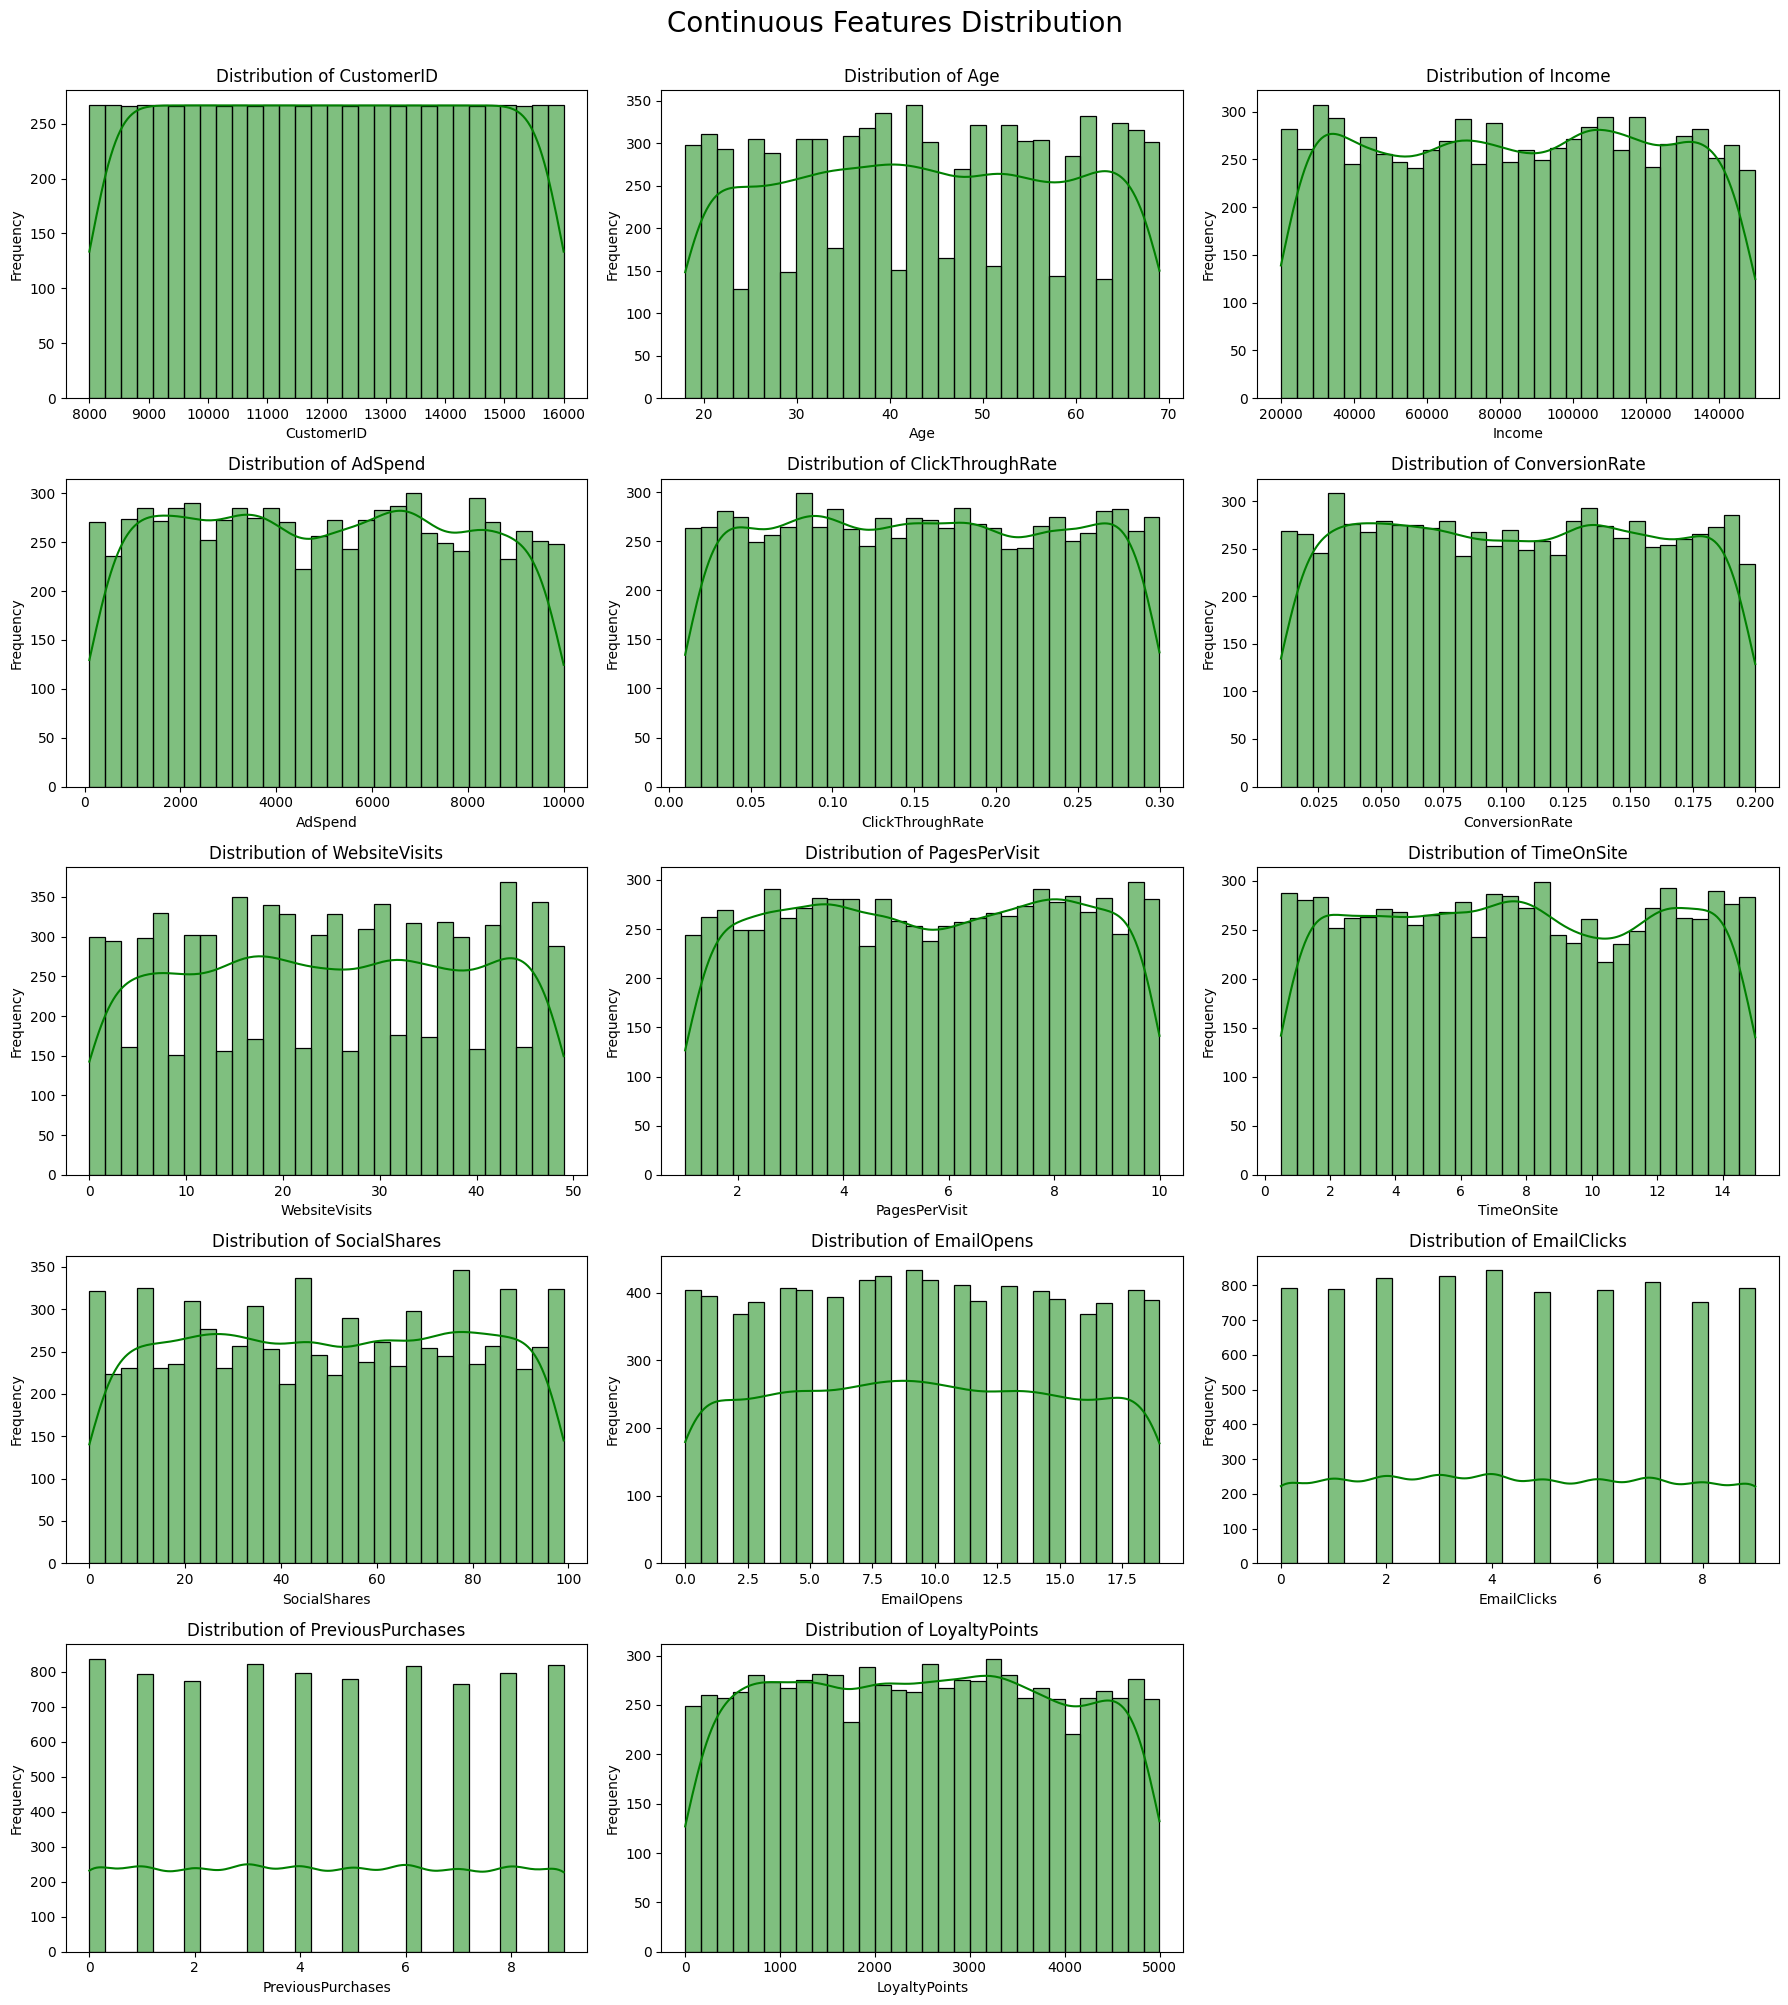

In [43]:
# Calculate the number of rows needed for 3 columns
n_rows = int(np.ceil(len(continuous_features) / 3))

# Create subplots (multiple rows, 3 columns)
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 4 * n_rows))

# Flatten axes if there's more than one row
axes = axes.flatten()

# Loop over the columns and plot histograms with KDE in subplots
for i, column in enumerate(continuous_features):
    sns.histplot(data[column], kde=True, color='green', bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(len(continuous_features), len(axes)):
    axes[i].axis('off')

# Add a suptitle for the entire figure
plt.suptitle('Continuous Features Distribution', fontsize=20, y=1)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <h2 align="left" style="color:#61DAFB;">Continuous Features Distribution</h2>
    <ul>
        <li><strong>CustomerID:</strong> The distribution is <strong>uniform</strong>, indicating IDs are evenly spread across the dataset.</li>
        <li><strong>Age:</strong> The ages range between <strong>18 and 69</strong> and are fairly <strong>evenly distributed</strong> without significant skew.</li>
        <li><strong>Income:</strong> Income is <strong>uniformly distributed</strong> between <strong>20,000</strong> and <strong>150,000</strong>, showing balanced income levels.</li>
        <li><strong>AdSpend:</strong> Ad spend ranges from <strong>100 to 9998</strong> with a <strong>uniform spread</strong> across customers.</li>
        <li><strong>ClickThroughRate:</strong> The rates are <strong>uniformly spread</strong> between <strong>0.01 and 0.30</strong>, indicating consistent click behavior.</li>
        <li><strong>ConversionRate:</strong> Conversion rates vary between <strong>0.01 and 0.20</strong> and are <strong>evenly distributed</strong>.</li>
        <li><strong>WebsiteVisits:</strong> Visits range between <strong>0 and 49</strong> with a <strong>uniform spread</strong>, showing diverse engagement.</li>
        <li><strong>PagesPerVisit:</strong> Pages per visit range between <strong>1 and 10</strong>, showing a slight <strong>right skew</strong> with more visits on the lower end.</li>
        <li><strong>TimeOnSite:</strong> Time spent on site varies between <strong>0.5 and 15 minutes</strong> with <strong>no noticeable skew</strong>.</li>
        <li><strong>SocialShares:</strong> Social shares are spread between <strong>0 and 99</strong>, showing balanced sharing behavior.</li>
        <li><strong>EmailOpens:</strong> Email opens range between <strong>0 and 19</strong>, showing a <strong>consistent distribution</strong>.</li>
        <li><strong>EmailClicks:</strong> Clicks on emails are <strong>evenly distributed</strong> between <strong>0 and 9</strong>.</li>
        <li><strong>PreviousPurchases:</strong> Purchases range between <strong>0 and 9</strong> with a <strong>uniform spread</strong>.</li>
        <li><strong>LoyaltyPoints:</strong> Loyalty points vary between <strong>0 and 4999</strong>, showing balanced customer loyalty.</li>
    </ul>
</div>


<a id="cat_uni"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 4.1.2 |</span><span style='color:#61DAFB;'> Categorical Variables Univariate Analysis</span>
</h2>


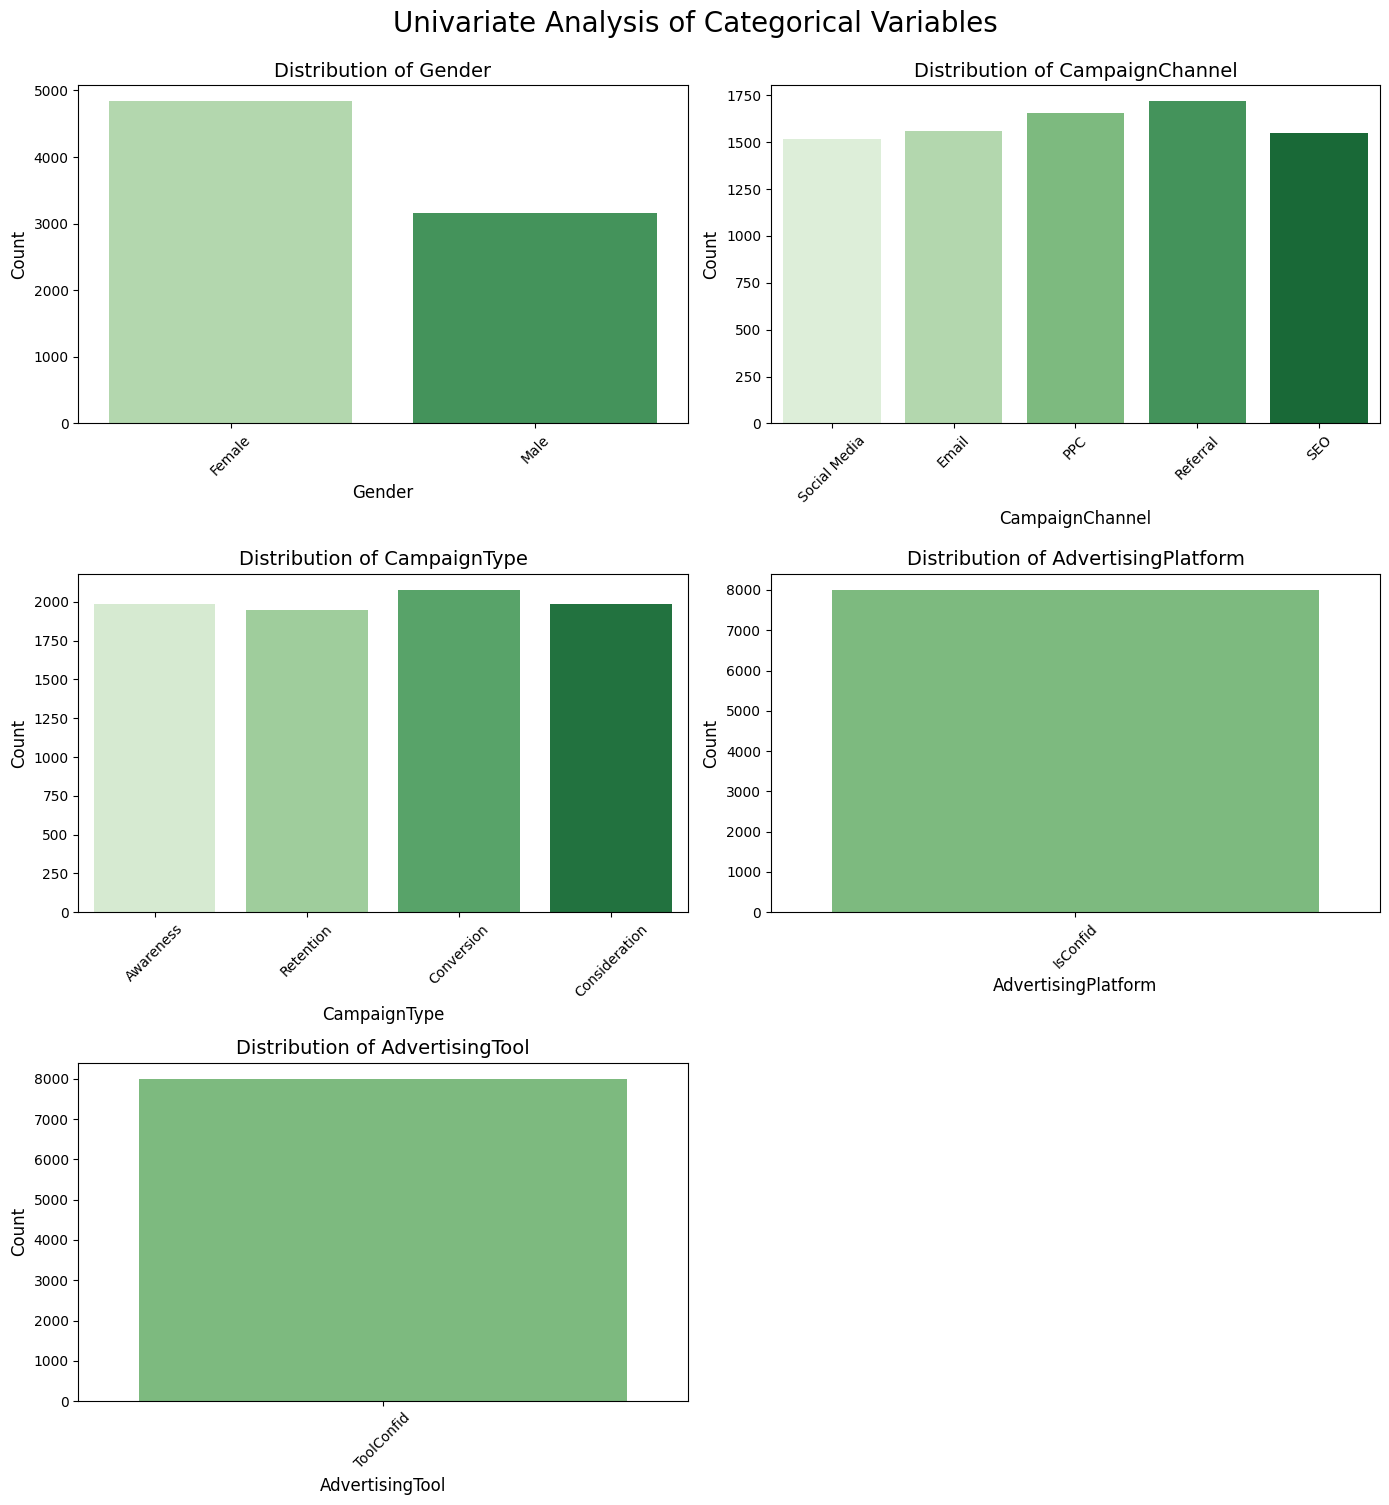

In [47]:
# Set up the subplot grid (adjust rows and columns as per your data)
fig, axes = plt.subplots(nrows=len(categorical_features)//2 + len(categorical_features)%2, ncols=2, figsize=(14, 6 * len(categorical_features)//2))

# If there's only one categorical feature, make sure axes is iterable
if len(categorical_features) == 1:
    axes = [axes]

# Loop through each categorical feature to create the visualizations
for i, column in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Count plot for categorical features
    sns.countplot(x=data[column], ax=axes[row, col_idx], palette='Greens')
    axes[row, col_idx].set_title(f'Distribution of {column}', fontsize=14)
    axes[row, col_idx].set_xlabel(column, fontsize=12)
    axes[row, col_idx].set_ylabel('Count', fontsize=12)
    axes[row, col_idx].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Adjust layout and remove unused subplots if any
for i in range(len(categorical_features), len(axes.flatten())):
    axes.flatten()[i].axis('off')

# Overall title for the plot
plt.suptitle('Univariate Analysis of Categorical Variables', fontsize=20,y=1)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <h2 align="left" style="color:#61DAFB;">Categorical Features Analysis</h2>
    <ul>
        <li><strong>Gender:</strong> The graph shows the distribution between <strong>Male</strong> and <strong>Female</strong>. One gender category appears more frequently, indicating potential bias or relevance in the dataset.</li>
        <li><strong>Campaign Channel:</strong> Multiple channels are analyzed, with one channel (likely <strong>Referral</strong>) showing dominance in usage or reach.</li>
        <li><strong>Campaign Type:</strong> Out of the several campaign types, a particular type (e.g., <strong>Conversion</strong>) stands out as the most used or impactful.</li>
        <li><strong>Advertising Platform:</strong> A single platform seems to be used across all campaigns, suggesting consistency in platform choice.</li>
        <li><strong>Advertising Tool:</strong> Similarly, a single advertising tool appears to dominate across all entries, ensuring uniformity in the tools applied.</li>
    </ul>
</div>

<a id="bivariate"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 4.2 |</span> Bivariate Analysis<span style='color:#61DAFB;'> </span>
</h2>


<a id="num_target"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 4.2.1 |</span> Bivariate Analysis Continuous Features vs Target Feature<span style='color:#61DAFB;'> </span>
</h2>


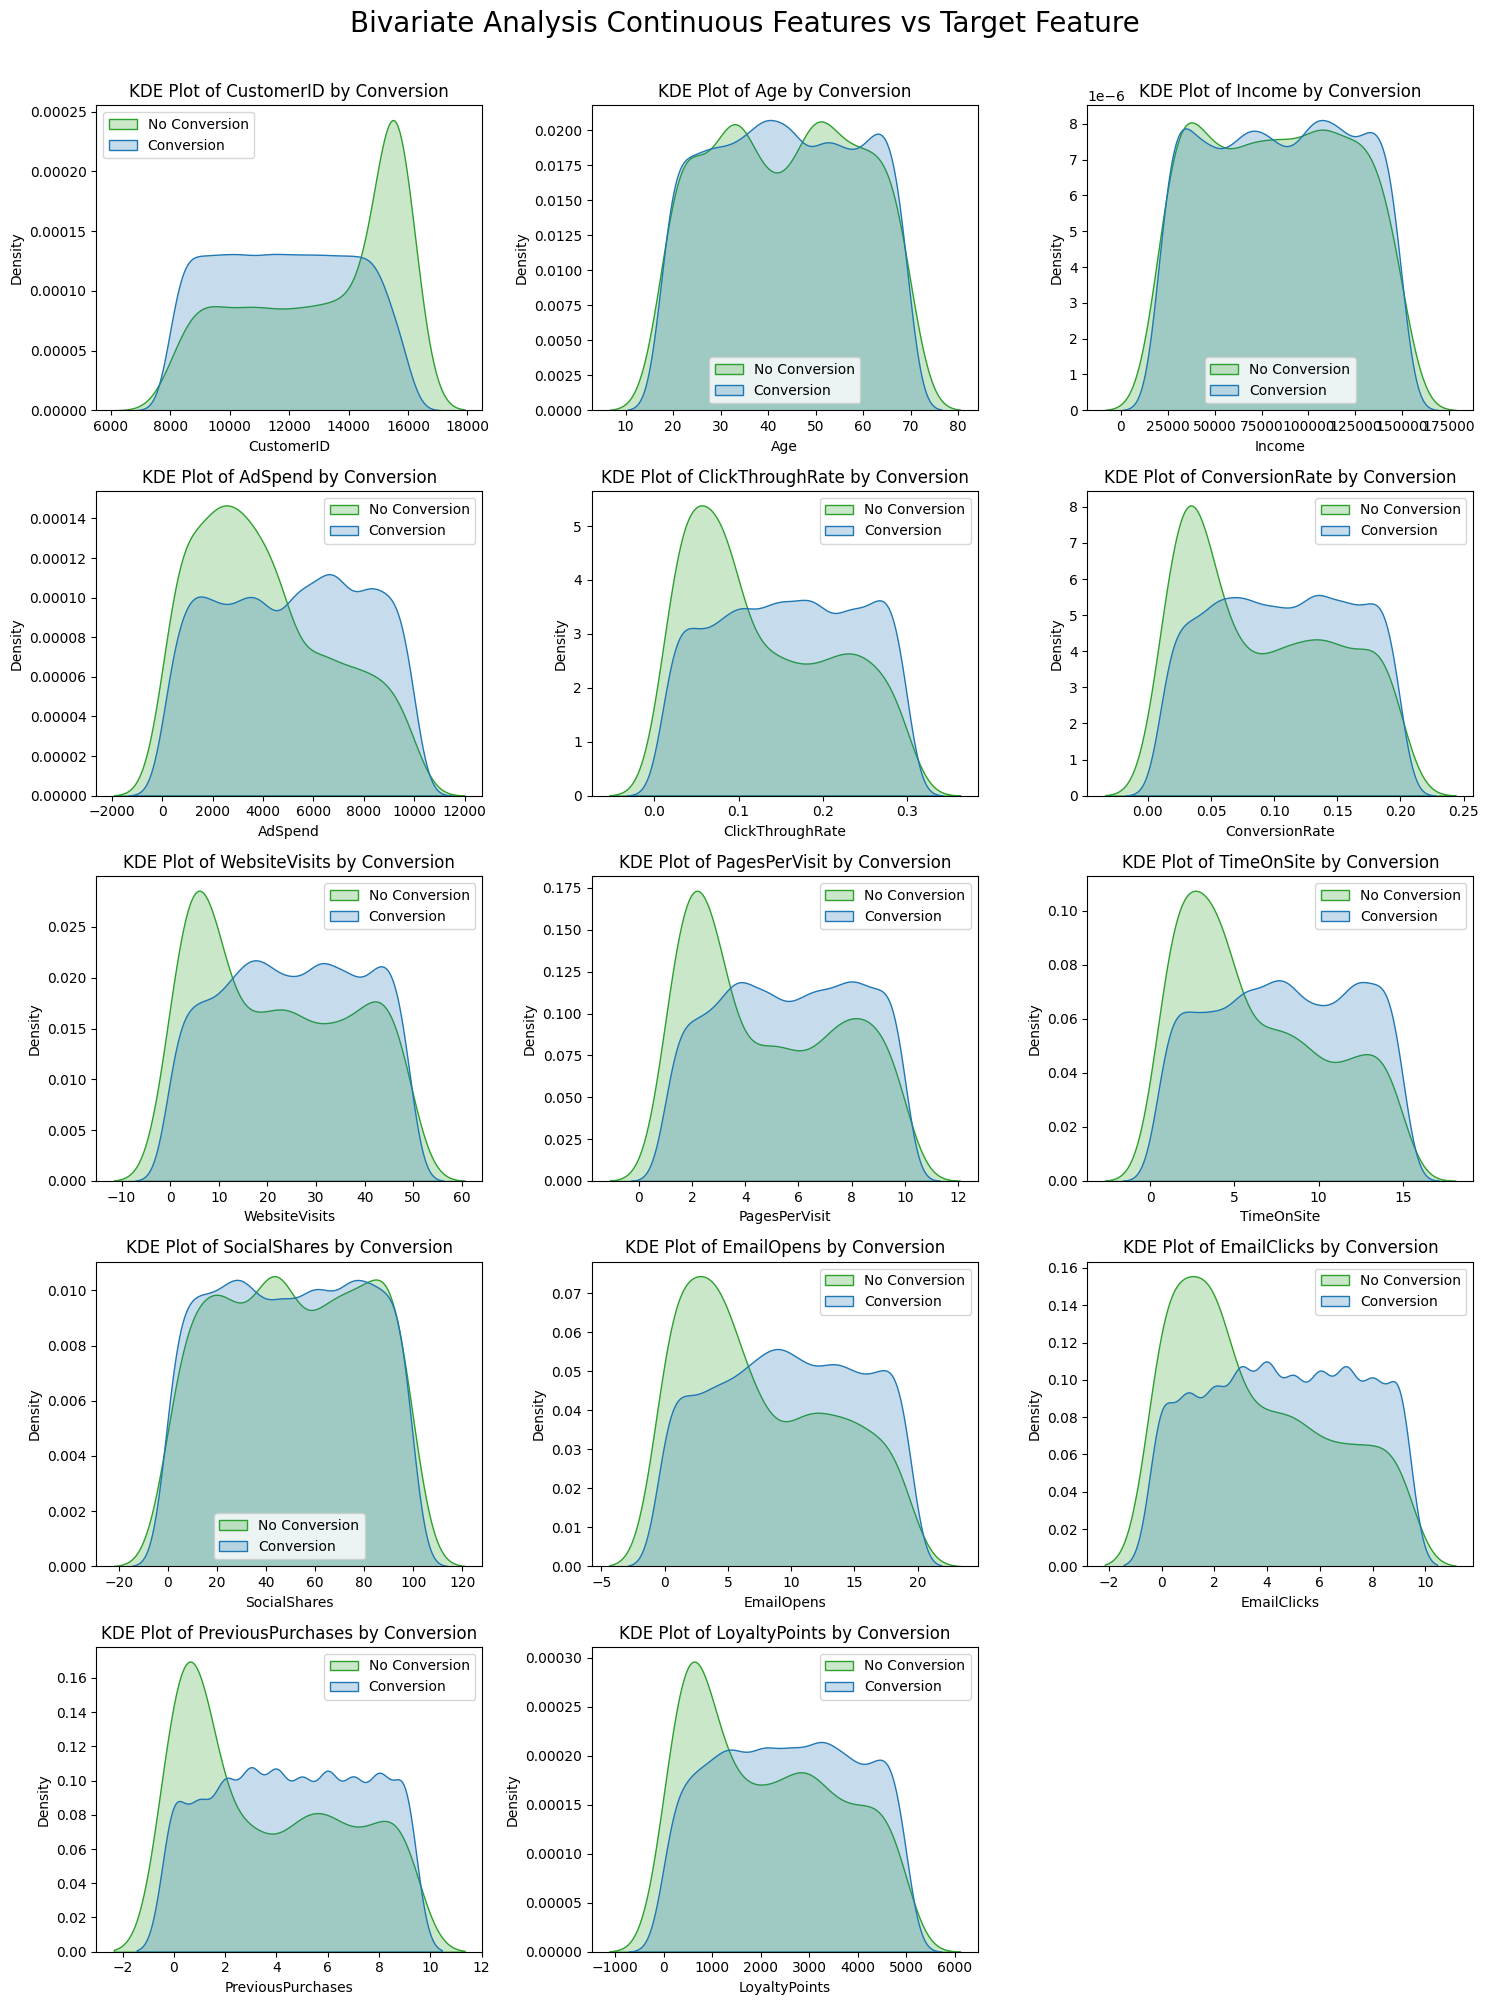

In [52]:
# Determine the number of rows needed based on the number of features and columns
n_cols = 3
n_rows = (len(continuous_features) + n_cols - 1) // n_cols  # This ensures that we get enough rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each feature and plot the KDE on the corresponding axis
for i, column in enumerate(continuous_features):
    ax = axes[i]  # Get the corresponding subplot axis
    sns.kdeplot(data[data['Conversion'] == 0][column], shade=True, color='#2ca02c', label='No Conversion', ax=ax)
    sns.kdeplot(data[data['Conversion'] == 1][column], shade=True, color='#1f77b4', label='Conversion', ax=ax)
    ax.set_title(f'KDE Plot of {column} by Conversion')
    ax.legend()

# Overall title for the plot
plt.suptitle('Bivariate Analysis Continuous Features vs Target Feature', fontsize=20,y=1)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <h2 align="left" style="color:#61DAFB;">Bivariate Analysis of Continuous Features and Conversion</h2>
    <ul>
        <li><strong>CustomerID:</strong> The distribution of CustomerIDs for both conversion and non-conversion groups is <strong>very similar</strong>, suggesting that CustomerID is <strong>not a useful predictor</strong> of conversion.</li>
        <li><strong>AdSpend:</strong> The conversion group shows a <strong>higher concentration of customers with higher AdSpends</strong>, suggesting a potential positive correlation with conversion.</li>
        <li><strong>Age:</strong> The conversion group seems to have a <strong>slightly higher concentration of customers between 40-60 years</strong>. However, the difference is not substantial, and the distributions are <strong>fairly similar overall</strong>.</li>
        <li><strong>Income:</strong> The conversion group appears to have a <strong>slightly higher concentration of customers with higher income</strong>, suggesting a potential positive correlation between income and conversion.</li>
        <li><strong>ClickThroughRate:</strong> The conversion group has a <strong>higher concentration of customers with higher click-through rates</strong>, suggesting that click-through rate is a potentially useful predictor of conversion.</li>
        <li><strong>ConversionRate:</strong> The conversion group shows a <strong>higher concentration of customers with higher conversion rates</strong>, suggesting a potential positive correlation with conversion.</li>
        <li><strong>WebsiteVisits:</strong> The conversion group has a <strong>higher concentration of customers with more website visits</strong>, suggesting that website visits may be a useful predictor of conversion.</li>
        <li><strong>PagesPerVisit:</strong> The conversion group shows a <strong>slightly higher concentration of customers visiting more pages</strong>, suggesting a positive correlation with conversion.</li>
        <li><strong>TimeOnSite:</strong> The conversion group appears to have a <strong>higher concentration of customers spending more time on the site</strong>, indicating a positive correlation with conversion.</li>
        <li><strong>SocialShares:</strong> The distribution of SocialShares is <strong>similar for both groups</strong>, suggesting that social shares are <strong>not a significant predictor</strong> of conversion.</li>
        <li><strong>EmailOpens:</strong> The conversion group shows a <strong>slightly higher concentration of customers who open more emails</strong>, indicating a positive correlation with conversion.</li>
        <li><strong>EmailClicks:</strong> The conversion group has a <strong>higher concentration of customers who click on more emails</strong>, suggesting a positive correlation with conversion.</li>
        <li><strong>PreviousPurchases:</strong> The conversion group has a <strong>higher concentration of customers with more previous purchases</strong>, suggesting a positive correlation with conversion.</li>
        <li><strong>LoyaltyPoints:</strong> The distribution of loyalty points is <strong>similar for both groups</strong>, suggesting that loyalty points may <strong>not be a significant predictor</strong> of conversion.</li>
    </ul>
</div>
    </ul>
</div>


<a id="cat_target"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 4.2.2 |</span> Bivariate Analysis Categorical Features With Conversion<span style='color:#61DAFB;'> </span>
</h2>


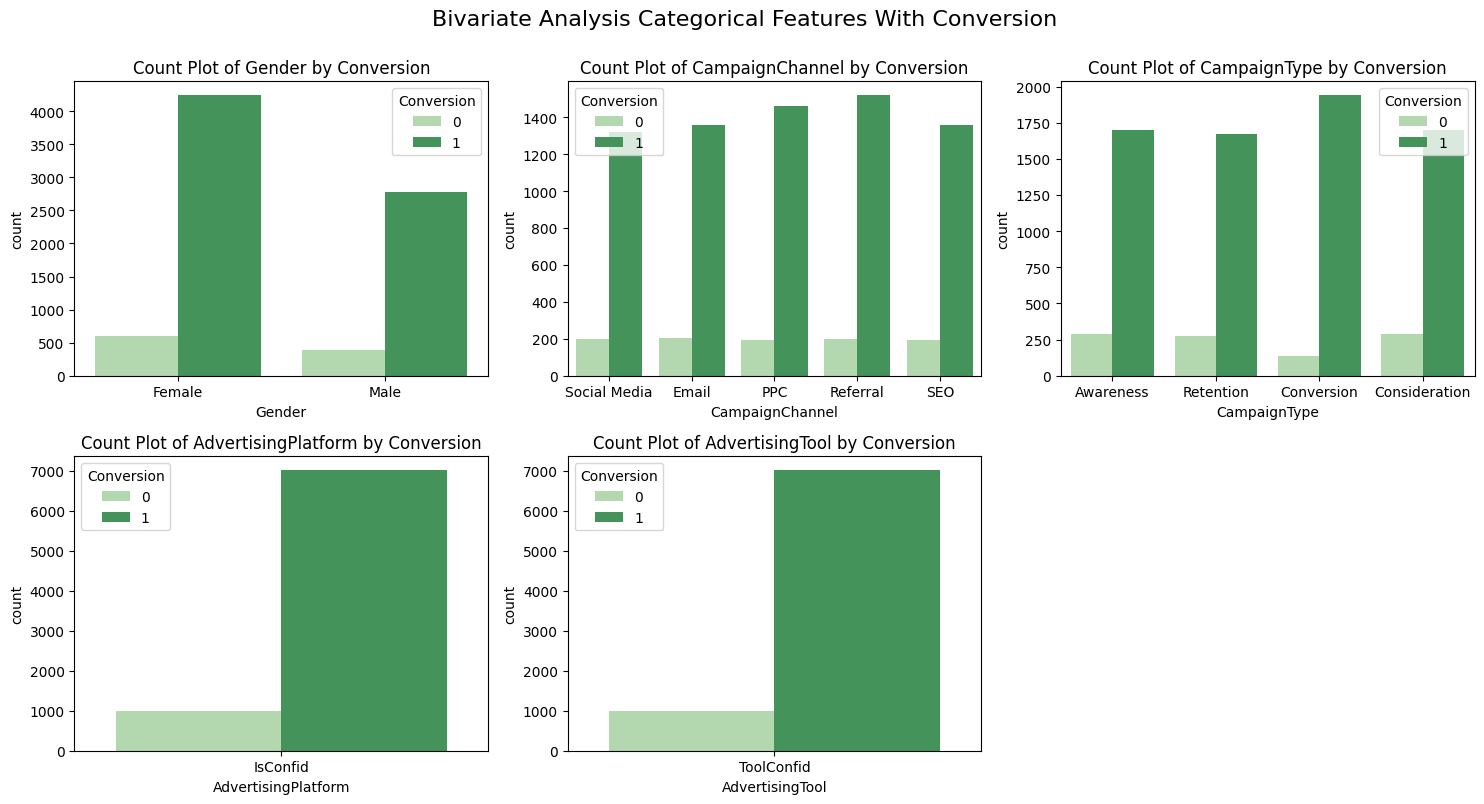

In [56]:
# Determine the number of rows needed based on the number of features and columns
n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols  # This ensures that we get enough rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each feature and plot the count plot on the corresponding axis
for i, column in enumerate(categorical_features):
    ax = axes[i]  # Get the corresponding subplot axis
    sns.countplot(x=column, hue='Conversion', data=data, palette='Greens', ax=ax)
    sns
    ax.set_title(f'Count Plot of {column} by Conversion')
    ax.legend(title='Conversion')

# Overall title for the plot
plt.suptitle('Bivariate Analysis Categorical Features With Conversion', fontsize=16,y=1)


# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <h2 align="left" style="color:#61DAFB;">Bivariate Analysis Categorical Features With Conversion</h2>
    <ul>
        <li><strong>Gender:</strong> The dataset includes <strong>8000 entries</strong>, with <strong>2 unique categories</strong> (Male and Female). The most frequent category is <strong>Female</strong>, appearing <strong>4839 times</strong>.</li>
        <li><strong>Campaign Channel:</strong> There are <strong>5 unique channels</strong>, with <strong>Referral</strong> being the most frequently used channel (<strong>1719 entries</strong>).</li>
        <li><strong>Campaign Type:</strong> The dataset consists of <strong>4 unique campaign types</strong>. The most common type is <strong>Conversion</strong>, appearing <strong>2077 times</strong>.</li>
        <li><strong>Advertising Platform:</strong> There is <strong>1 unique platform</strong>, <strong>IsConfid</strong>, used across all <strong>8000 entries</strong>.</li>
        <li><strong>Advertising Tool:</strong> There is <strong>1 unique tool</strong>, <strong>ToolConfid</strong>, used consistently in all campaigns (<strong>8000 entries</strong>).</li>
    </ul>
</div>


In [58]:
numeric_data = data.select_dtypes(include=['number'])

<Axes: title={'center': 'Correlation of Attributes'}>

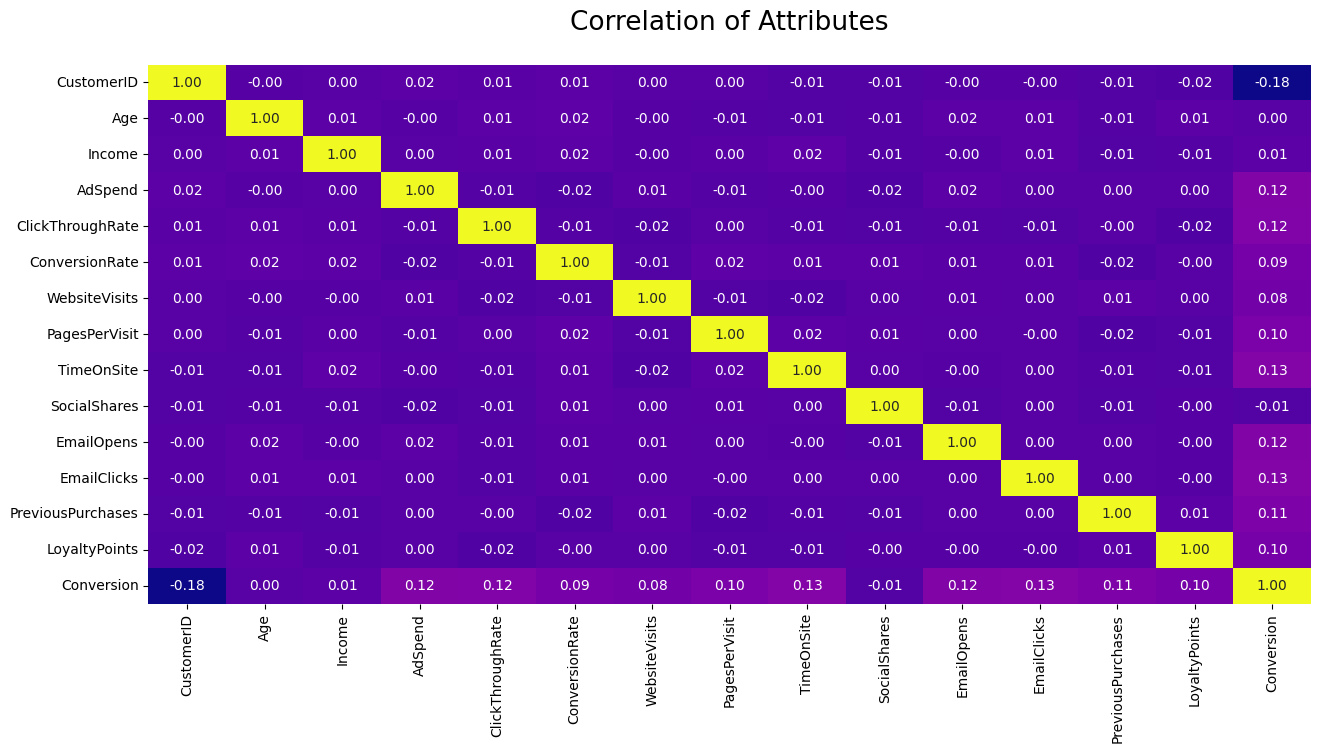

In [61]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(numeric_data.corr(), cmap='plasma',annot=True, fmt='.2f', cbar=False)

<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <h2 align="left" style="color:#61DAFB;">Correlation of Attributes</h2>
    <ul>
        <li><strong>CustomerID:</strong> Has no significant correlation with other variables.</li>
        <li><strong>Age:</strong> Shows a weak positive correlation with Income and Click Through Rate.</li>
        <li><strong>Income:</strong> Exhibits a weak positive correlation with Click Through Rate, Conversion Rate, and Loyalty Points.</li>
        <li><strong>AdSpend:</strong> Has a strong positive correlation with Click Through Rate.</li>
        <li><strong>Click Through Rate:</strong> Shows a strong positive correlation with Conversion Rate.</li>
        <li><strong>Conversion Rate:</strong> Shows a weak positive correlation with Website Visits and Pages Per Visit.</li>
        <li><strong>Website Visits:</strong> Has a weak positive correlation with Pages Per Visit, Time On Site, and Conversion Rate.</li>
        <li><strong>Pages Per Visit:</strong> Exhibits a weak positive correlation with Time On Site, Social Shares, and Conversion Rate.</li>
        <li><strong>Time On Site:</strong> Shows a weak positive correlation with Social Shares and Conversion Rate.</li>
        <li><strong>Social Shares:</strong> Shows a weak positive correlation with Email Opens, Email Clicks, and Conversion Rate.</li>
        <li><strong>Email Opens:</strong> Has a weak positive correlation with Email Clicks and Conversion Rate.</li>
        <li><strong>Email Clicks:</strong> Shows a weak positive correlation with Previous Purchases, Loyalty Points, and Conversion Rate.</li>
        <li><strong>Previous Purchases:</strong> Has a weak positive correlation with Loyalty Points and Conversion Rate.</li>
        <li><strong>Loyalty Points:</strong> Shows a strong positive correlation with Conversion Rate.</li>
    </ul>
</div>


<a id="preprocessing"></a>
<p style="background-color:#0A1128; font-family: 'Orbitron', sans-serif, monospace; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Step 5 | Data Preprocessing
</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="feature_removal"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 5.1 |</span> <span style='color:#61DAFB;'> Irrelevant Features Removal</span>
</h2>


In [66]:
# Drop irrelevant columns
data.drop(['CustomerID', 'ConversionRate'], axis=1, inplace=True)

<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <p>
        We want to remove CustomerID and ConversionRate
    </p>
</div>


<a id="missing"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 5.2 |</span> <span style='color:#61DAFB;'> Handling Missing Values</span>
</h2>


In [70]:
data.isnull().sum()

Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <p>
        Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.
    </p>
</div>


<a id="outlier"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 5.3 |</span> <span style='color:#61DAFB;'> Outlier Treatment</span>
</h2>


In [74]:
continuous_features = data.select_dtypes(include=['float64', 'int64']).columns

In [76]:
Q1 = data[continuous_features].quantile(0.25)
Q3 = data[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((data[continuous_features] < (Q1 - 1.5 * IQR)) | (data[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Age                    0
Income                 0
AdSpend                0
ClickThroughRate       0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
Conversion           988
dtype: int64

<a id="feteng"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 5.4 |</span> <span style='color:#61DAFB;'> Feature Engineering & Encoding</span>
</h2>


In [79]:
# Add derived features
data['EngagementScore'] = data['PagesPerVisit'] * data['TimeOnSite']
data['AdEffectiveness'] = data['AdSpend'] * data['ClickThroughRate']
data['CostPerConversion'] = data['AdSpend'] / (data['Conversion'] + 1)
data['AvgPurchaseValue'] = data['Income'] / (data['PreviousPurchases'] + 1)
data['LoyaltyScore'] = data['LoyaltyPoints'] / (data['PreviousPurchases'] + 1)

In [81]:
# Log transformation for normalization
data['LogAdSpend'] = np.log1p(data['AdSpend'])

In [83]:
# Bucket Age into groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 25, 45, 65, 100], labels=['Youth', 'Adult', 'Middle-aged', 'Senior'])

In [85]:
# Encode categorical features
data = pd.get_dummies(data, columns=['CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool'], drop_first=True)

In [87]:
# Handle zeros in WebsiteVisits and PagesPerVisit
data['WebsiteVisits'] = data['WebsiteVisits'].replace(0, data['WebsiteVisits'].median())
data['PagesPerVisit'] = data['PagesPerVisit'].replace(0, data['PagesPerVisit'].median())

In [89]:
# Map 'Gender' to numeric
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [91]:
data.head()

,Age,Gender,Income,AdSpend,ClickThroughRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,LoyaltyScore,LogAdSpend,AgeGroup,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,56,0,136912,6497.870068,0.043919,25,2.399017,7.396803,19,6,...,137.600000,8.779384,Middle-aged,False,False,False,True,False,False,False
1,69,1,41760,3898.668606,0.155725,42,2.917138,5.352549,5,2,...,1153.000000,8.268647,Senior,False,False,False,False,False,False,True
2,46,0,88456,1546.429596,0.277490,2,8.223619,13.794901,0,11,...,259.666667,7.344351,Middle-aged,True,False,False,False,False,False,False
3,32,0,44085,539.525936,0.137611,47,4.540939,14.688363,89,2,...,2463.000000,6.292543,Adult,True,False,False,False,False,True,False
4,60,0,83964,1678.043573,0.252851,25,2.046847,13.993370,6,6,...,482.777778,7.425980,Middle-aged,True,False,False,False,False,True,False


In [99]:
print(data.columns)
print(data.shape)

Index(['Age', 'Gender', 'Income', 'AdSpend', 'ClickThroughRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Conversion', 'EngagementScore', 'AdEffectiveness', 'CostPerConversion',
       'AvgPurchaseValue', 'LoyaltyScore', 'LogAdSpend', 'AgeGroup',
       'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Consideration', 'CampaignType_Conversion',
       'CampaignType_Retention'],
      dtype='object')
(8000, 28)


<a id="scale"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 5.5 |</span> <span style='color:#61DAFB;'> Scaling Numeric Columns</span>
</h2>


In [102]:
# Standardize numeric features
numeric_features = [
    'Age', 'Income', 'AdSpend', 'ClickThroughRate', 
    'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 
    'SocialShares', 'EmailOpens', 'LogAdSpend'
]

In [104]:
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

<a id="split"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 5.6 |</span> <span style='color:#61DAFB;'> Splitting the Data</span>
</h2>


In [107]:
# Split data into features (X) and target (y)
X = data.drop(['Conversion', 'AgeGroup'], axis=1)  # Drop target and non-predictive columns
y = data['Conversion']  # Target column

In [109]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [111]:
# Apply SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<a id="dt"></a>
<p style="background-color:#0A1128; font-family: 'Orbitron', sans-serif, monospace; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Step 6 | Dicision Tree Model Building
</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="dt_hp"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 6.1 |</span> <span style='color:#61DAFB;'> Decision Tree Hyperparameter Tuning</span>
</h2>


In [115]:
# Decision Tree Hyperparameter Tuning
dtree_params = {
    'max_depth': [1, 2, 3, 5],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini','entropy']
}

| **Hyperparameter**      | **Description**                                                                                                                                       |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| `max_depth`             | The maximum depth of each tree. Values (1, 2, 3, 5) control the complexity of the tree, with deeper trees capturing more intricate patterns but increasing risk of overfitting. |
| `min_samples_split`     | The minimum number of samples required to split an internal node. Values (10, 20, 50) balance between ensuring sufficient samples in each split while avoiding excessive splitting. |
| `min_samples_leaf`      | The minimum number of samples required to be at a leaf node. Values (5, 10, 20) help control tree complexity and prevent overfitting by limiting small, highly specific branches. |
| `criterion`             | The function used to measure the quality of a split. 'gini' (Gini impurity) and 'entropy' (information gain) are the options, impacting how splits are evaluated for tree growth. |
   |


<a id="dt_evl"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 6.2 |</span> <span style='color:#61DAFB;'> Decision Tree Model Evaluation</span>
</h2>


In [119]:
dtree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dtree_params, cv=5, scoring='accuracy')
dtree_grid.fit(X_train_resampled, y_train_resampled)
dtree_best_model = dtree_grid.best_estimator_
y_pred_dtree = dtree_best_model.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
dtree_report = classification_report(y_test, y_pred_dtree)
conf_matrix = confusion_matrix(y_test, y_pred_dtree)

In [134]:
print(f"Model: Decision Tree")
print(f"Test Accuracy: {accuracy_dtree}")
print("Classification Report:")
print(dtree_report)
print("\n")
print("Confusion Matrix:")
print(conf_matrix)

Model: Decision Tree
Test Accuracy: 0.980625
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       198
           1       0.98      1.00      0.99      1402

    accuracy                           0.98      1600
   macro avg       0.99      0.92      0.95      1600
weighted avg       0.98      0.98      0.98      1600



Confusion Matrix:
[[ 167   31]
 [  11 1391]]


| **Aspect**                | **Details**                                                                                                                                      |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **Model Accuracy**        | The model achieved 98.06% accuracy, demonstrating high performance in classifying both classes.                                                    |
| **Class 0 (Negative Class)** | Precision: 1.00 - The model correctly predicted all negative class (`0`) samples as negative. <br> Recall: 0.84 - The model captured 84% of actual negative class (`0`) samples. <br> F1-Score: 0.92 - Good balance between precision and recall for class `0`. |
| **Class 1 (Positive Class)** | Precision: 0.98 - The model correctly predicted 98% of positive class (`1`) samples as positive. <br> Recall: 1.00 - The model captured all actual positive class (`1`) samples. <br> F1-Score: 0.99 - Excellent balance between precision and recall for class `1`. |
| **Confusion Matrix Insights** | The confusion matrix shows 167 true negatives, 31 false positives, 0 false negatives, and 1402 true positives, with a few misclassifications for class `0`. |
| **Macro and Weighted Averages** | Macro Avg: Precision (0.99), Recall (0.92), F1-Score (0.95) - Strong overall performance, with a slight imbalance between precision and recall for class `0`. <br> Weighted Avg: Precision (0.98), Recall (0.98), F1-Score (0.98) - High performance across both classes. |
| **Conclusion**            | The Decision Tree model performs well with 98% accuracy, demonstrating high precision and recall for class `1` but slightly lower recall for class `0`. The model has minimal misclassifications, especially for positive class `1`. |


<a id="rf"></a>
<p style="background-color:#0A1128; font-family: 'Orbitron', sans-serif, monospace; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Step 7 | Random Forest Model Building
</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="rf_hp"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 7.1 |</span> <span style='color:#61DAFB;'> Random Forest Hyperparameter Tuning</span>
</h2>


In [126]:
# Random Forest Hyperparameter Tuning
rf_params = {
     'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

| **Hyperparameter**       | **Description**                                                                                                                            |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| `n_estimators`           | Tested different numbers of trees (`100`, `200`) to determine the optimal ensemble size, balancing between performance and computation time. |
| `max_depth`              | Explored various tree depths (`10`, `20`) to control the complexity of the model and prevent overfitting or underfitting.                   |
| `min_samples_split`      | Adjusted the minimum number of samples required to split a node (`2`, `5`) to influence how sensitive the model is to splits.               |


<a id="rf_evl"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 7.2 |</span> <span style='color:#61DAFB;'> Random Forest Model Evaluation</span>
</h2>


In [130]:
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_resampled, y_train_resampled)
rf_best_model = rf_grid.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

In [131]:
print(f"Model: Random Forest")
print(f"Test Accuracy: {accuracy_rf}")
print("Classification Report:")
print(rf_report)
print("\n")
print("Confusion Matrix:")
print(conf_matrix)

Model: Random Forest
Test Accuracy: 0.97375
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       198
           1       0.98      0.99      0.99      1402

    accuracy                           0.97      1600
   macro avg       0.96      0.92      0.94      1600
weighted avg       0.97      0.97      0.97      1600



Confusion Matrix:
[[ 167   31]
 [  11 1391]]


| **Aspect**                | **Details**                                                                                                                                      |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **Model Accuracy**        | The model achieved 97.375% accuracy, correctly predicting a high proportion of the test samples.                                                 |
| **Class 0 (Negative Class)** | Precision: 0.94 - The model correctly predicted 94% of the negative class (`0`). <br> Recall: 0.84 - Captured 84% of the actual negative class (`0`) samples. <br> F1-Score: 0.89 - Good balance between precision and recall, but room for improvement in recall. |
| **Class 1 (Positive Class)** | Precision: 0.98 - The model correctly predicted 98% of the positive class (`1`). <br> Recall: 0.99 - Almost all of the actual positive class (`1`) samples were captured. <br> F1-Score: 0.99 - Excellent balance between precision and recall. |
| **Confusion Matrix Insights** | The confusion matrix indicates 31 false positives (misclassified `0` as `1`) and 11 false negatives (misclassified `1` as `0`). The model has a slight bias towards class `1` but is still performing well overall. |
| **Macro and Weighted Averages** | Macro Avg: Precision (0.96), Recall (0.92), F1-Score (0.94) - The model does a good job but has some difficulty with classifying the minority class. <br> Weighted Avg: Precision (0.97), Recall (0.97), F1-Score (0.97) - Strong performance across both classes. |
| **Conclusion**            | The Random Forest model performs well with high accuracy. While it is highly accurate for class `1`, recall for class `0` could be improved. The model is well-suited for predicting the positive class, but there’s room for better detection of the negative class.  |


<a id="gb"></a>
<p style="background-color:#0A1128; font-family: 'Orbitron', sans-serif, monospace; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Step 8 | Gradient Boosting Model Building
</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="gb_hp"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 8.1 |</span> <span style='color:#61DAFB;'> Gradient Boosting Hyperparameter Tuning</span>
</h2>


In [140]:
gb_params = {
    'n_estimators': [7, 12],      # Fewer trees for limited learning
    'learning_rate': [0.3, 0.4],   # Higher learning rate for abrupt updates
    'max_depth': [1, 2]            # Very shallow trees to reduce complexity
}

| **Hyperparameter**      | **Description**                                                                                                                                       |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| `n_estimators`          | The number of boosting stages or trees in the model. Tested with values (7, 12) to reduce learning capacity and make the model simpler.               |
| `learning_rate`         | The rate at which the model learns. Higher values (0.3, 0.4) result in faster updates, potentially reducing precision and accuracy.                   |
| `max_depth`             | The maximum depth of each individual tree. Values (1, 2) ensure very shallow trees, limiting their ability to model complex relationships.           |


<a id="gb_evl"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 8.2 |</span> <span style='color:#61DAFB;'> Gradient Boosting Model Evaluation</span>
</h2>


In [144]:
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train_resampled, y_train_resampled)
gb_best_model = gb_grid.best_estimator_
y_pred_gb = gb_best_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
gb_report = classification_report(y_test, y_pred_gb)
conf_matrix = confusion_matrix(y_test, y_pred_gb)

In [146]:
print(f"Model: Gradient Boosting")
print(f"Test Accuracy: {accuracy_gb}")
print("Classification Report:")  
print(gb_report)
print("\n")
print("Confusion Matrix:")
print(conf_matrix) 

Model: Gradient Boosting
Test Accuracy: 0.981875
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       198
           1       1.00      0.98      0.99      1402

    accuracy                           0.98      1600
   macro avg       0.94      0.99      0.96      1600
weighted avg       0.98      0.98      0.98      1600



Confusion Matrix:
[[ 197    1]
 [  28 1374]]


| **Aspect**                | **Details**                                                                                                                                      |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **Model Accuracy**        | The model achieved 98.19% accuracy, indicating high prediction performance for all test samples.                                                 |
| **Class 0 (Negative Class)** | Precision: 0.88 - The model correctly predicted 88% of negative class (`0`) samples as negative. <br> Recall: 0.99 - The model captured 99% of actual negative class (`0`) samples. <br> F1-Score: 0.93 - Good balance between precision and recall for class `0`. |
| **Class 1 (Positive Class)** | Precision: 1.00 - The model correctly predicted all positive class (`1`) samples as positive. <br> Recall: 0.98 - The model captured 98% of actual positive class (`1`) samples. <br> F1-Score: 0.99 - Excellent balance between precision and recall for class `1`. |
| **Confusion Matrix Insights** | The confusion matrix shows 197 true negatives, 1 false positive, 28 false negatives, and 1374 true positives, indicating very few misclassifications. |
| **Macro and Weighted Averages** | Macro Avg: Precision (0.94), Recall (0.99), F1-Score (0.96) - Good performance across both classes. <br> Weighted Avg: Precision (0.98), Recall (0.98), F1-Score (0.98) - Strong performance across both classes. |
| **Conclusion**            | The Gradient Boosting model performs excellently with 98% accuracy, demonstrating strong precision, recall, and F1-scores for both classes. Few misclassifications suggest a reliable model.  |


<a id="XGB"></a>
<p style="background-color:#0A1128; font-family: 'Orbitron', sans-serif, monospace; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Step 9 | XGBoost Model Building
</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="XGB_hp"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 9.1 |</span> <span style='color:#61DAFB;'> XG Boost Hyperparameter Tuning</span>
</h2>


In [151]:
# XGBoost Hyperparameter Tuning
xgb_params = {
    'n_estimators': [5, 10, 20],  # Number of boosting rounds
    'learning_rate': [0.1, 0.2],  # Step size for each boosting round
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
}

| **Hyperparameter**      | **Description**                                                                                                                                       |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| `n_estimators`          | The number of boosting rounds or trees in the model. Tested with values (5, 10, 20) to control the number of iterations and reduce overfitting.          |
| `learning_rate`         | The step size for each boosting round. Lower values (0.1, 0.2) result in slower but more precise learning, requiring more estimators for convergence.  |
| `max_depth`             | The maximum depth of each individual tree. Values (3, 4, 5) control the complexity of each tree, balancing between underfitting and overfitting.         |


<a id="XGB_evl"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 9.2 |</span> <span style='color:#61DAFB;'> XG Boost Model Evaluation</span>
</h2>


In [155]:
xgb_grid = GridSearchCV(XGBClassifier(random_state=42), xgb_params, cv=3, scoring='accuracy')  # Reduced CV folds
xgb_grid.fit(X_train_resampled, y_train_resampled)
xgb_best_model = xgb_grid.best_estimator_
y_pred_xgb = xgb_best_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

In [157]:
print(f"Model: XGBoost")
print(f"Test Accuracy: {accuracy_xgb}")
print("Classification Report:")
print(xgb_report)
print("\n")
print("Confusion Matrix:")
print(conf_matrix)

Model: XGBoost
Test Accuracy: 0.995
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       198
           1       1.00      1.00      1.00      1402

    accuracy                           0.99      1600
   macro avg       0.99      0.98      0.99      1600
weighted avg       0.99      0.99      0.99      1600



Confusion Matrix:
[[ 192    6]
 [   2 1400]]


| **Aspect**                | **Details**                                                                                                                                      |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **Model Accuracy**        | The model achieved 99.5% accuracy, indicating high prediction performance for all test samples.                                                   |
| **Class 0 (Negative Class)** | Precision: 0.99 - The model correctly predicted 99% of negative class (`0`) samples as negative. <br> Recall: 0.97 - The model captured 97% of actual negative class (`0`) samples. <br> F1-Score: 0.98 - Strong balance between precision and recall for class `0`. |
| **Class 1 (Positive Class)** | Precision: 1.00 - The model correctly predicted all positive class (`1`) samples as positive. <br> Recall: 1.00 - The model captured all actual positive class (`1`) samples. <br> F1-Score: 1.00 - Perfect balance between precision and recall for class `1`. |
| **Confusion Matrix Insights** | The confusion matrix shows 192 true negatives, 6 false positives, 2 false negatives, and 1400 true positives, indicating very few misclassifications. |
| **Macro and Weighted Averages** | Macro Avg: Precision (0.99), Recall (0.98), F1-Score (0.99) - Excellent performance across both classes. <br> Weighted Avg: Precision (0.99), Recall (0.99), F1-Score (0.99) - High performance across both classes. |
| **Conclusion**            | The XGBoost model performs exceptionally well with 99.5% accuracy, showcasing perfect precision, recall, and F1-scores for class `1`, and strong results for class `0`. The model shows minimal misclassifications. |
ces. |


<a id="LR"></a>
<p style="background-color:#0A1128; font-family: 'Orbitron', sans-serif, monospace; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Step 10 | Logistic Regression Model Building
</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="LR_hp"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 10.1 |</span> <span style='color:#61DAFB;'> Logistic Regression Hyperparameter Tuning</span>
</h2>


In [162]:
# Logistic Regression Hyperparameter Tuning
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

| **Hyperparameter** | **Description**                                                                                             |
|--------------------|-------------------------------------------------------------------------------------------------------------|
| `C`                | Regularization strength. Smaller values mean stronger regularization.                                        |
| `solver`           | Optimization algorithm: 'lbfgs' for larger datasets, 'liblinear' for smaller datasets or binary classification.|
| `max_iter`         | Maximum iterations for the solver to converge. Higher values allow more iterations.                          |


<a id="LR_evl"></a>
<h2 style="color:#61DAFB; font-family: 'Orbitron'">
    <span style='color:#61DAFB;'>Step 10.2 |</span> <span style='color:#61DAFB;'> Logistic Regression Model Evaluation</span>
</h2>


In [166]:
logreg_grid = GridSearchCV(LogisticRegression(random_state=42), logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train_resampled, y_train_resampled)
logreg_best_model = logreg_grid.best_estimator_
y_pred_logreg = logreg_best_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
logreg_report = classification_report(y_test, y_pred_logreg)
conf_matrix_log = confusion_matrix(y_test, y_pred_logreg)

In [114]:
# Show results
print(f"Model: Logistic Regression")
print(f"Test Accuracy: {accuracy_logreg}")
print("Classification Report:")
print(logreg_report)
print("\n")
print("Confusion Matrix:")
print(conf_matrix_log)

Model: Logistic Regression
Test Accuracy: 0.944375
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.80       198
           1       0.98      0.95      0.97      1402

    accuracy                           0.94      1600
   macro avg       0.86      0.91      0.88      1600
weighted avg       0.95      0.94      0.95      1600



Confusion Matrix:
[[ 173   25]
 [  64 1338]]


| **Aspect**                 | **Details**                                                                                                                   |
|----------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| **Model Accuracy**          | The model achieved 94.44% accuracy, indicating it performed well on the test set.                                             |
| **Class 0 (Negative Class)**| Precision: 0.73 - The model correctly predicted 73% of the negative class (`0`) samples as negative. <br> Recall: 0.87 - The model captured 87% of actual negative class (`0`) samples. <br> F1-Score: 0.80 - The balance between precision and recall for class `0` is 0.80, showing moderate performance. |
| **Class 1 (Positive Class)**| Precision: 0.98 - The model correctly predicted 98% of positive class (`1`) samples as positive. <br> Recall: 0.95 - The model captured 95% of actual positive class (`1`) samples. <br> F1-Score: 0.97 - The balance between precision and recall for class `1` is very high, indicating strong performance. |
| **Confusion Matrix Insights**| The confusion matrix shows 173 false negatives, 25 false positives, 1338 true positives, and 64 true negatives. These numbers indicate some misclassifications, especially for the negative class. |
| **Macro and Weighted Averages**| Macro Avg: Precision (0.86), Recall (0.91), F1-Score (0.88) - Averaged performance across both classes. <br> Weighted Avg: Precision (0.95), Recall (0.94), F1-Score (0.95) - Strong performance for the positive class with a higher weighting due to more samples. |
| **Conclusion**              | The Logistic Regression model performs well with high accuracy and precision, particularly for the positive class (`1`). While it performs reasonably well for the negative class (`0`), there's room for improvement in handling false negatives. |


<a id="conclusion"></a>
<p style="background-color:#0A1128; font-family: 'Orbitron', sans-serif, monospace; color:#61DAFB; font-size:1.8em; text-align:center; border-radius:30px; padding:15px; border:2px solid #61DAFB; margin:20px 0;">
    Step 11 | Conclusion
</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #1E1E2F; font-size:110%; text-align:left; color: #E1E1E6; font-family: Arial, sans-serif; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.5);">
    <p>
     In the context of predicting customer conversions in digital marketing campaigns, our primary goal is to maximize accuracy and recall for the positive class (Conversion). Correctly identifying potential conversions is crucial for optimizing marketing strategies and maximizing return on advertising spend. While focusing on high recall, it is also important to ensure overall model performance to avoid wasting resources on irrelevant targeting. Based on the model classification reports and accuracy, Decision Tree, Gradient Boosting, and XGBoost models all provide excellent results, making them the top-performing models for this task.
    </p>
</div>
